In [1]:
"""
This notebook plots the mapping curves computed between nissl-nissl or nissl-neurotrace blue.
"""

'\nThis notebook plots the mapping curves computed between nissl-nissl or nissl-neurotrace blue.\n'

In [2]:
import os
import sys

from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import DataFrame

sys.path.append(os.path.join(os.environ['REPO_DIR'], 'utilities'))
from utilities2015 import *
from data_manager import *
from metadata import *

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


Setting environment for Precision WorkStation


No vtk


# Plot for one stack

In [3]:
# stack = 'MD635'
stack = 'ChatCryoJane201710'

In [4]:
if stack == 'ChatCryoJane201710':
    nissl_sections = []
    ntb_sections = [metadata_cache['filenames_to_sections'][stack][fn] 
                    for fn in metadata_cache['valid_filenames'][stack]]
else:
    nissl_sections = [metadata_cache['filenames_to_sections'][stack][fn] 
                      for fn in metadata_cache['valid_filenames'][stack] if fn.split('-')[1][0] == 'N']
    ntb_sections = [metadata_cache['filenames_to_sections'][stack][fn] 
                    for fn in metadata_cache['valid_filenames'][stack] if fn.split('-')[1][0] == 'F']

In [5]:
# Generate nissl-nissl pairs.

# compare_pairs = []
# for nissl_sec in nissl_sections:
#     for i in range(1, 10):
#         closest_nissl_sec = nissl_sec + i
#         if closest_nissl_sec in nissl_sections:
#             break
#     compare_pairs.append((nissl_sec, closest_nissl_sec))

# Generate ntb-ntb pairs.

compare_pairs = []
for ntb_sec in ntb_sections:
    for i in range(1, 10):
        closest_ntb_sec = ntb_sec + i
        if closest_ntb_sec in ntb_sections:
            break
    compare_pairs.append((ntb_sec, closest_ntb_sec))

In [6]:
# nissl2_values = np.arange(0, 256)
# nissl2_values = np.arange(0, 5001)
nissl2_values = np.arange(0, 65536)

In [18]:
compare_pairs_available = {}

for i, (nissl1_sec, nissl2_sec) in enumerate(compare_pairs):

    try:
        fp = os.path.join(THUMBNAIL_DATA_DIR, stack, stack + '_intensity_mapping', '%s_to_%s_intensity_mapping_all_regions.npy' % \
                          (metadata_cache['sections_to_filenames'][stack][nissl2_sec], metadata_cache['sections_to_filenames'][stack][nissl1_sec]))
    #         download_from_s3(fp, local_root=THUMBNAIL_DATA_ROOTDIR)
        nissl2_matched_values = np.load(fp)
        compare_pairs_available[(nissl1_sec, nissl2_sec)] = nissl2_matched_values
    except:
#         sys.stderr.write("Mapping from %s to %s does not exist.\n" % \
#                         (metadata_cache['sections_to_filenames'][stack][nissl2_sec],
#                         metadata_cache['sections_to_filenames'][stack][nissl1_sec]))
        continue

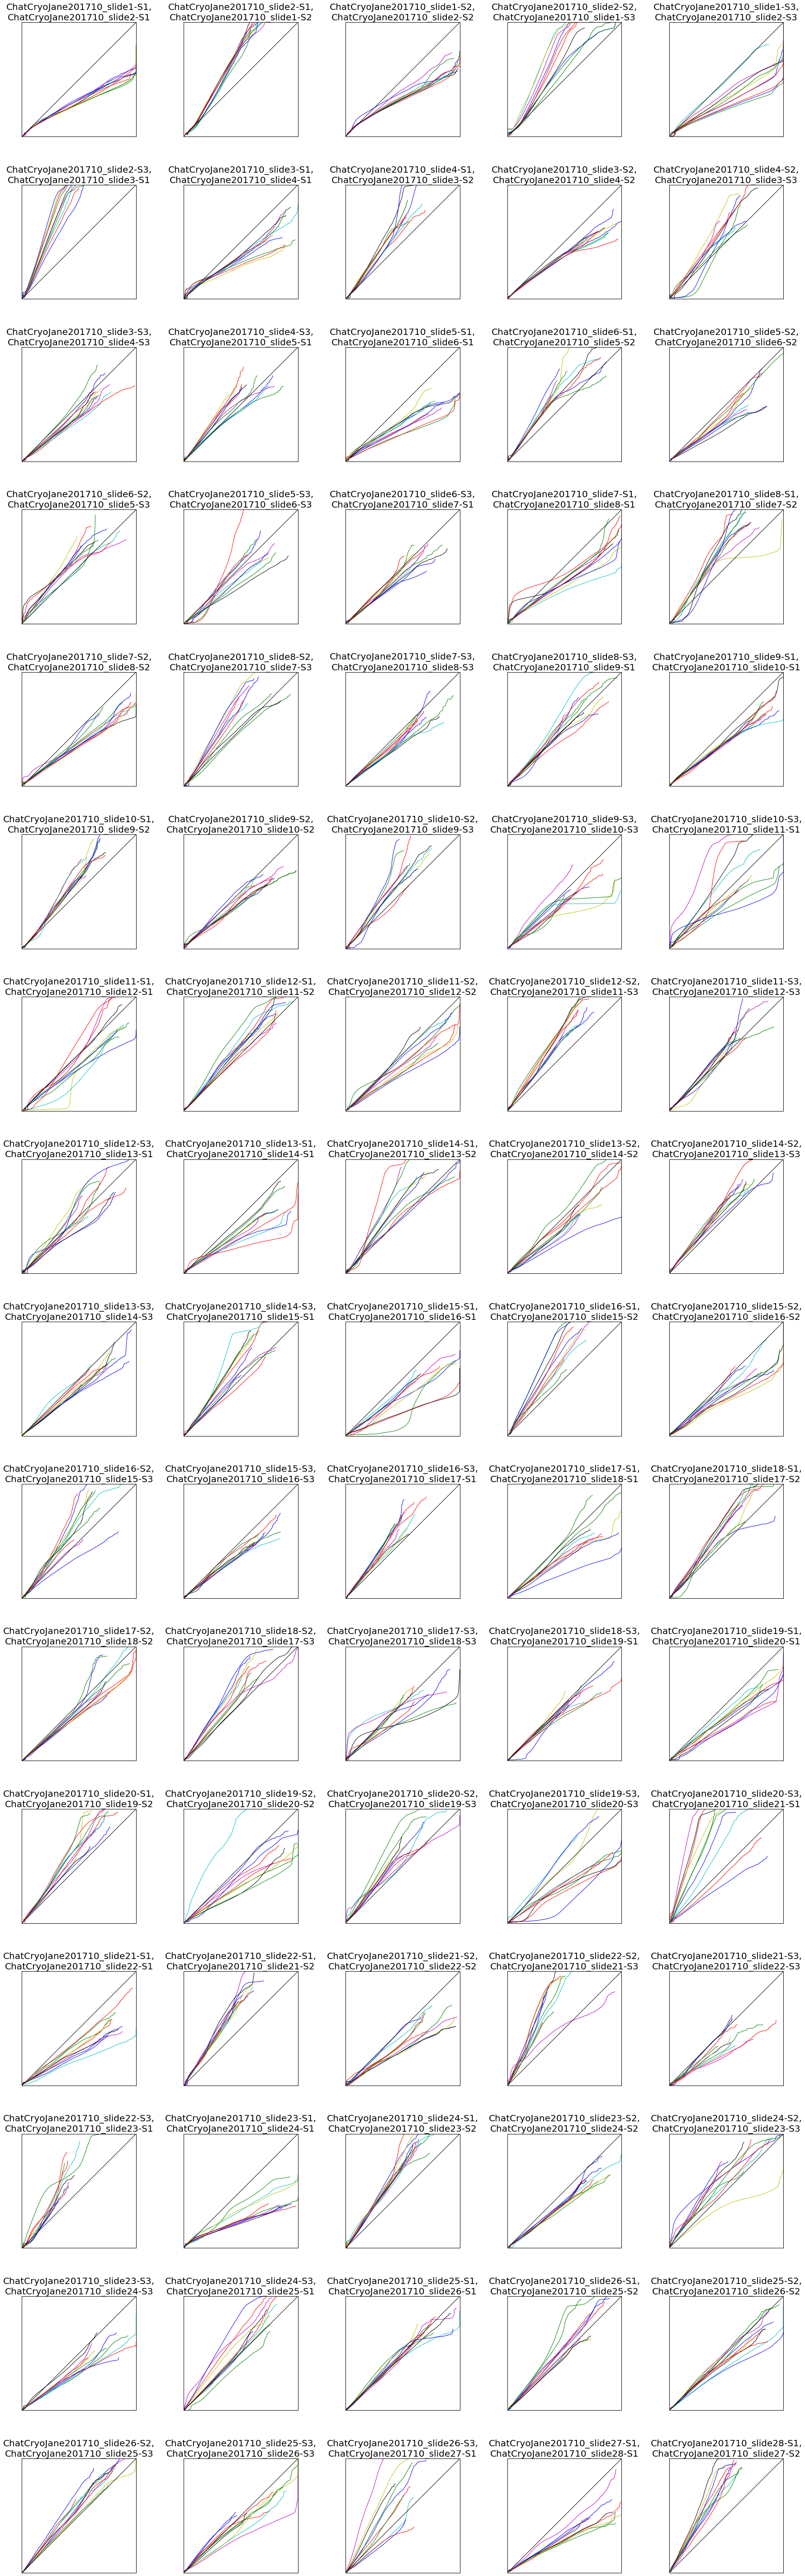

In [23]:
nc = 5

titles = ['%s,\n%s' % (metadata_cache['sections_to_filenames'][stack][nissl1_sec], 
                      metadata_cache['sections_to_filenames'][stack][nissl2_sec]) 
          for (nissl1_sec, nissl2_sec), _ in sorted(compare_pairs_available.items())]

mappings_allPairs = [m for _, m in sorted(compare_pairs_available.items())]

n = len(compare_pairs_available)
nr = int(np.ceil(n/float(nc)))
aspect_ratio = 1 # width / height

fig, axes = plt.subplots(nr, nc, figsize=(nc*5*aspect_ratio, nr*5))
axes = axes.flatten()

for i in range(len(axes)):
    
    if i >= n:
        axes[i].axis('off');
    else:
        axes[i].plot(nissl2_values, mappings_allPairs[i].T)
        axes[i].plot(nissl2_values,  nissl2_values, c='k')

        if titles is not None:
            axes[i].set_title(titles[i], fontsize=20);
#         axes[i].set_xlim([0,2000]);
#         axes[i].set_ylim([0,2000]);
        axes[i].set_xlim([0,nissl2_values.max()]);
        axes[i].set_ylim([0,nissl2_values.max()]);
        axes[i].set_xticks([]);
        axes[i].set_yticks([]);
        axes[i].set(adjustable='box-forced', aspect='equal');

fig.tight_layout();

plt.show();

In [27]:
# for nissl1_sec, nissl2_sec in compare_pairs:
        
#     try:
#         fp = os.path.join(THUMBNAIL_DATA_DIR, stack, stack + '_intensity_mapping', '%s_to_%s_intensity_mapping_all_regions.npy' % \
#                           (metadata_cache['sections_to_filenames'][stack][nissl2_sec], metadata_cache['sections_to_filenames'][stack][nissl1_sec]))
#         download_from_s3(fp, local_root=THUMBNAIL_DATA_ROOTDIR)
#         nissl2_matched_values = np.load(fp)
#     except:
#         sys.stderr.write("Mapping from %s to %s does not exist." % \
#                         (metadata_cache['sections_to_filenames'][stack][nissl2_sec],
#                         metadata_cache['sections_to_filenames'][stack][nissl1_sec]))
    
#     plt.figure(figsize=(5,5));
    
#     plt.plot(nissl2_values, nissl2_matched_values.T);
# #     plt.plot(np.arange(0, 255),  np.arange(0, 255), c='k')
#     plt.plot(np.arange(0, 2000),  np.arange(0, 2000), c='k')
# #     plt.xlim([0,256]);
# #     plt.ylim([0,256]);
#     plt.xlabel('Nissl2 intensity');
#     plt.ylabel('Nissl2 matched to Nissl1 intensity');
#     plt.title('%d, %d' % (nissl1_sec, nissl2_sec));
#     plt.axis('equal');
#     plt.show();

In [17]:
sections_to_filenames = metadata_cache['sections_to_filenames'][stack]

In [18]:
nissl_sections = [sec for sec, fn in sections_to_filenames.iteritems() if not is_invalid(fn) and fn.split('-')[1][0] == 'N' and sec > first_sec and sec < last_sec]
ntb_sections = [sec for sec, fn in sections_to_filenames.iteritems() if not is_invalid(fn) and fn.split('-')[1][0] == 'F' and sec > first_sec and sec < last_sec]

In [19]:
filename_pairs = []
for nissl_sec in nissl_sections:
    for i in range(1, 99):
        closest_ntb_sec = nissl_sec + i
        if closest_ntb_sec in ntb_sections or closest_ntb_sec > last_sec:
            break
    if sections_to_filenames[closest_ntb_sec].split('-')[1][0] == 'F':
        filename_pairs.append((sections_to_filenames[nissl_sec], sections_to_filenames[closest_ntb_sec]))

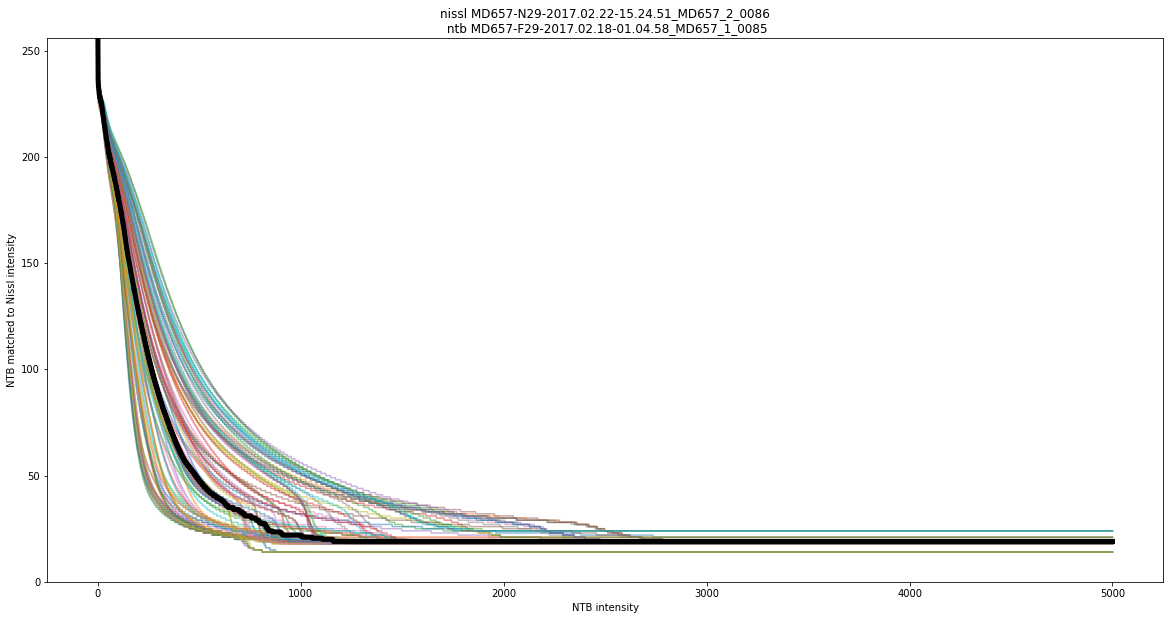

In [5]:
median_mapping_all_pairs = {}

for nissl_fn, ntb_fn in filename_pairs:
# for nissl_fn, ntb_fn in [('MD657-N29-2017.02.22-15.24.51_MD657_2_0086',
#   'MD657-F29-2017.02.18-01.04.58_MD657_1_0085')]:
        
    fp = os.path.join(DATA_DIR, stack, stack + '_intensity_mapping', '%s_to_%s_intensity_mapping_all_regions.npy' % (ntb_fn, nissl_fn))
    download_from_s3(fp)
    ntb_matched_values = np.load(fp)
    
    fp = os.path.join(DATA_DIR, stack, stack + '_intensity_mapping', '%s_to_%s_region_bboxes.npy' % (ntb_fn, nissl_fn))
    download_from_s3(fp)
    region_bboxes_all_examples_one_section = np.load(fp)
            
    plt.figure(figsize=(20, 10));
    
    ntb_values = np.arange(0, 5001)
    for m, bbox in zip(ntb_matched_values, region_bboxes_all_examples_one_section):
        plt.plot(ntb_values, m, label=str(bbox), alpha=.5);
    
#     median_mapping = np.median(ntb_matched_values, axis=0)
    fp = os.path.join(DATA_DIR, stack, stack + '_intensity_mapping', '%s_intensity_mapping.npy' % ntb_fn)
    download_from_s3(fp)
    median_mapping = np.load(fp)
    plt.plot(ntb_values, median_mapping, c='k', linewidth=5)
    
    median_mapping_all_pairs[(nissl_fn, ntb_fn)] = median_mapping
    
#     plt.xlim([0,6000]);
    plt.ylim([0,256]);
    plt.xlabel('NTB intensity');
    plt.ylabel('NTB matched to Nissl intensity');
    plt.title('nissl %s\n ntb %s' % (nissl_fn, ntb_fn));
#     plt.legend();
    plt.show();

In [37]:
for nissl_fn, ntb_fn in filename_pairs:
    median_mapping = median_mapping_all_pairs[(nissl_fn, ntb_fn)]
#     fp = os.path.join(DATA_DIR, stack, stack + '_histogram_matching', '%s_to_%s_matched_values_median.npy' % (ntb_fn, nissl_fn))
    fp = os.path.join(DATA_DIR, stack, stack + '_intensity_mapping', '%s_intensity_mapping.npy' % (ntb_fn))
    create_parent_dir_if_not_exists(fp)
    np.save(fp, median_mapping)
    upload_to_s3(fp)

aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F18-2017.04.04-19.29.18_MD658_3_0054_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F18-2017.04.04-19.29.18_MD658_3_0054_intensity_mapping.npy


Child returned 0
0.43 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F19-2017.04.12-19.31.00_MD658_1_0055_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F19-2017.04.12-19.31.00_MD658_1_0055_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F19-2017.04.12-19.31.00_MD658_2_0056_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F19-2017.04.12-19.31.00_MD658_2_0056_intensity_mapping.npy


Child returned 0
0.37 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F19-2017.04.04-19.44.45_MD658_3_0057_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F19-2017.04.04-19.44.45_MD658_3_0057_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F20-2017.04.12-19.48.14_MD658_1_0058_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F20-2017.04.12-19.48.14_MD658_1_0058_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F20-2017.04.04-20.00.33_MD658_2_0059_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F20-2017.04.04-20.00.33_MD658_2_0059_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F20-2017.04.04-20.00.33_MD658_3_0060_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F20-2017.04.04-20.00.33_MD658_3_0060_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F21-2017.04.04-20.15.37_MD658_1_0061_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F21-2017.04.04-20.15.37_MD658_1_0061_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F21-2017.04.04-20.15.37_MD658_2_0062_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F21-2017.04.04-20.15.37_MD658_2_0062_intensity_mapping.npy


Child returned 0
0.37 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F22-2017.04.04-20.27.54_MD658_1_0064_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F22-2017.04.04-20.27.54_MD658_1_0064_intensity_mapping.npy


Child returned 0
0.43 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F22-2017.04.04-20.27.54_MD658_2_0065_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F22-2017.04.04-20.27.54_MD658_2_0065_intensity_mapping.npy


Child returned 0
0.43 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F23-2017.04.04-20.42.02_MD658_1_0067_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F23-2017.04.04-20.42.02_MD658_1_0067_intensity_mapping.npy


Child returned 0
0.37 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F23-2017.04.04-20.42.02_MD658_2_0068_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F23-2017.04.04-20.42.02_MD658_2_0068_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F24-2017.04.04-20.54.05_MD658_1_0070_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F24-2017.04.04-20.54.05_MD658_1_0070_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F24-2017.04.04-20.54.05_MD658_2_0071_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F24-2017.04.04-20.54.05_MD658_2_0071_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F25-2017.04.04-21.07.22_MD658_1_0073_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F25-2017.04.04-21.07.22_MD658_1_0073_intensity_mapping.npy


Child returned 0
0.37 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F25-2017.04.04-21.07.22_MD658_2_0074_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F25-2017.04.04-21.07.22_MD658_2_0074_intensity_mapping.npy


Child returned 0
0.47 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F26-2017.04.04-21.20.41_MD658_1_0076_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F26-2017.04.04-21.20.41_MD658_1_0076_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F26-2017.04.04-21.20.41_MD658_2_0077_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F26-2017.04.04-21.20.41_MD658_2_0077_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F27-2017.04.04-21.35.33_MD658_1_0079_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F27-2017.04.04-21.35.33_MD658_1_0079_intensity_mapping.npy


Child returned 0
0.37 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F27-2017.04.04-21.35.33_MD658_2_0080_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F27-2017.04.04-21.35.33_MD658_2_0080_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F28-2017.04.04-21.51.10_MD658_1_0082_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F28-2017.04.04-21.51.10_MD658_1_0082_intensity_mapping.npy


Child returned 0
0.37 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F28-2017.04.04-21.51.10_MD658_2_0083_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F28-2017.04.04-21.51.10_MD658_2_0083_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F29-2017.04.04-22.06.12_MD658_1_0085_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F29-2017.04.04-22.06.12_MD658_1_0085_intensity_mapping.npy


Child returned 0
0.37 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F29-2017.04.04-22.06.12_MD658_2_0086_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F29-2017.04.04-22.06.12_MD658_2_0086_intensity_mapping.npy


Child returned 0
0.38 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F30-2017.04.04-22.22.02_MD658_1_0088_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F30-2017.04.04-22.22.02_MD658_1_0088_intensity_mapping.npy


Child returned 0
0.37 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F30-2017.04.04-22.22.02_MD658_2_0089_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F30-2017.04.04-22.22.02_MD658_2_0089_intensity_mapping.npy


Child returned 0
0.36 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F31-2017.04.04-22.39.14_MD658_1_0091_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F31-2017.04.04-22.39.14_MD658_1_0091_intensity_mapping.npy


Child returned 0
0.36 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F31-2017.04.04-22.39.14_MD658_2_0092_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F31-2017.04.04-22.39.14_MD658_2_0092_intensity_mapping.npy


Child returned 0
0.37 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F32-2017.04.04-22.55.49_MD658_1_0094_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F32-2017.04.04-22.55.49_MD658_1_0094_intensity_mapping.npy


Child returned 0
0.37 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F32-2017.04.04-22.55.49_MD658_2_0095_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F32-2017.04.04-22.55.49_MD658_2_0095_intensity_mapping.npy


Child returned 0
0.37 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F33-2017.04.04-23.12.27_MD658_1_0097_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F33-2017.04.04-23.12.27_MD658_1_0097_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F33-2017.04.04-23.12.27_MD658_2_0098_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F33-2017.04.04-23.12.27_MD658_2_0098_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F34-2017.04.04-23.30.17_MD658_1_0100_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F34-2017.04.04-23.30.17_MD658_1_0100_intensity_mapping.npy


Child returned 0
0.36 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F34-2017.04.04-23.30.17_MD658_2_0101_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F34-2017.04.04-23.30.17_MD658_2_0101_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F35-2017.04.04-23.48.51_MD658_1_0103_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F35-2017.04.04-23.48.51_MD658_1_0103_intensity_mapping.npy


Child returned 0
0.37 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F35-2017.04.04-23.48.51_MD658_2_0104_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F35-2017.04.04-23.48.51_MD658_2_0104_intensity_mapping.npy


Child returned 0
0.37 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F36-2017.04.05-00.05.46_MD658_1_0106_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F36-2017.04.05-00.05.46_MD658_1_0106_intensity_mapping.npy


Child returned 0
0.37 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F36-2017.04.05-00.05.46_MD658_2_0107_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F36-2017.04.05-00.05.46_MD658_2_0107_intensity_mapping.npy


Child returned 0
0.37 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F37-2017.04.05-00.23.56_MD658_2_0110_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F37-2017.04.05-00.23.56_MD658_2_0110_intensity_mapping.npy


Child returned 0
0.36 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F38-2017.04.05-00.43.15_MD658_1_0112_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F38-2017.04.05-00.43.15_MD658_1_0112_intensity_mapping.npy


Child returned 0
0.36 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F38-2017.04.05-00.43.15_MD658_2_0113_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F38-2017.04.05-00.43.15_MD658_2_0113_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F39-2017.04.05-01.00.25_MD658_1_0115_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F39-2017.04.05-01.00.25_MD658_1_0115_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F39-2017.04.05-01.00.25_MD658_2_0116_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F39-2017.04.05-01.00.25_MD658_2_0116_intensity_mapping.npy


Child returned 0
0.41 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F40-2017.04.05-01.18.31_MD658_1_0118_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F40-2017.04.05-01.18.31_MD658_1_0118_intensity_mapping.npy


Child returned 0
0.36 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F40-2017.04.05-01.18.31_MD658_2_0119_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F40-2017.04.05-01.18.31_MD658_2_0119_intensity_mapping.npy


Child returned 0
0.37 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F41-2017.04.05-01.36.02_MD658_2_0122_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F41-2017.04.05-01.36.02_MD658_2_0122_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F42-2017.04.05-01.51.45_MD658_1_0124_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F42-2017.04.05-01.51.45_MD658_1_0124_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F42-2017.04.05-01.51.45_MD658_2_0125_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F42-2017.04.05-01.51.45_MD658_2_0125_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F43-2017.04.05-02.10.06_MD658_1_0127_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F43-2017.04.05-02.10.06_MD658_1_0127_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F43-2017.04.05-02.10.06_MD658_2_0128_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F43-2017.04.05-02.10.06_MD658_2_0128_intensity_mapping.npy


Child returned 0
0.43 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F44-2017.04.05-11.53.25_MD658_1_0130_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F44-2017.04.05-11.53.25_MD658_1_0130_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F44-2017.04.05-11.53.25_MD658_2_0131_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F44-2017.04.05-11.53.25_MD658_2_0131_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F45-2017.04.05-02.29.00_MD658_1_0133_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F45-2017.04.05-02.29.00_MD658_1_0133_intensity_mapping.npy


Child returned 0
0.37 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F45-2017.04.05-02.29.00_MD658_2_0134_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F45-2017.04.05-02.29.00_MD658_2_0134_intensity_mapping.npy


Child returned 0
0.36 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F47-2017.04.05-03.01.03_MD658_1_0139_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F47-2017.04.05-03.01.03_MD658_1_0139_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F47-2017.04.05-03.01.03_MD658_2_0140_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F47-2017.04.05-03.01.03_MD658_2_0140_intensity_mapping.npy


Child returned 0
0.37 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F48-2017.04.05-03.19.01_MD658_2_0143_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F48-2017.04.05-03.19.01_MD658_2_0143_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F49-2017.04.05-03.36.45_MD658_1_0145_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F49-2017.04.05-03.36.45_MD658_1_0145_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F49-2017.04.05-03.36.45_MD658_2_0146_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F49-2017.04.05-03.36.45_MD658_2_0146_intensity_mapping.npy


Child returned 0
0.36 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F50-2017.04.05-03.53.13_MD658_1_0148_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F50-2017.04.05-03.53.13_MD658_1_0148_intensity_mapping.npy


Child returned 0
0.37 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F50-2017.04.05-03.53.13_MD658_2_0149_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F50-2017.04.05-03.53.13_MD658_2_0149_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F51-2017.04.05-04.11.47_MD658_1_0151_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F51-2017.04.05-04.11.47_MD658_1_0151_intensity_mapping.npy


Child returned 0
0.37 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F51-2017.04.05-04.11.47_MD658_2_0152_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F51-2017.04.05-04.11.47_MD658_2_0152_intensity_mapping.npy


Child returned 0
0.37 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F52-2017.04.05-04.30.53_MD658_1_0154_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F52-2017.04.05-04.30.53_MD658_1_0154_intensity_mapping.npy


Child returned 0
0.41 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F52-2017.04.05-04.30.53_MD658_2_0155_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F52-2017.04.05-04.30.53_MD658_2_0155_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F53-2017.04.05-04.48.56_MD658_1_0157_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F53-2017.04.05-04.48.56_MD658_1_0157_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F53-2017.04.05-04.48.56_MD658_2_0158_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F53-2017.04.05-04.48.56_MD658_2_0158_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F54-2017.04.05-05.08.54_MD658_1_0160_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F54-2017.04.05-05.08.54_MD658_1_0160_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F54-2017.04.05-05.08.54_MD658_2_0161_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F54-2017.04.05-05.08.54_MD658_2_0161_intensity_mapping.npy


Child returned 0
0.36 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F56-2017.04.05-05.43.40_MD658_1_0166_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F56-2017.04.05-05.43.40_MD658_1_0166_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F56-2017.04.05-05.43.40_MD658_1_0166_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F56-2017.04.05-05.43.40_MD658_1_0166_intensity_mapping.npy


Child returned 0
0.36 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F56-2017.04.05-05.43.40_MD658_1_0166_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F56-2017.04.05-05.43.40_MD658_1_0166_intensity_mapping.npy


Child returned 0
0.43 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F56-2017.04.05-05.43.40_MD658_2_0167_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F56-2017.04.05-05.43.40_MD658_2_0167_intensity_mapping.npy


Child returned 0
0.37 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F57-2017.04.05-06.03.16_MD658_1_0169_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F57-2017.04.05-06.03.16_MD658_1_0169_intensity_mapping.npy


Child returned 0
0.82 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F58-2017.04.05-06.12.45_MD658_1_0172_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F58-2017.04.05-06.12.45_MD658_1_0172_intensity_mapping.npy


Child returned 0
0.37 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F58-2017.04.05-06.12.45_MD658_1_0172_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F58-2017.04.05-06.12.45_MD658_1_0172_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F58-2017.04.05-06.12.45_MD658_2_0173_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F58-2017.04.05-06.12.45_MD658_2_0173_intensity_mapping.npy


Child returned 0
0.37 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F59-2017.04.05-06.30.32_MD658_1_0175_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F59-2017.04.05-06.30.32_MD658_1_0175_intensity_mapping.npy


Child returned 0
0.37 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F59-2017.04.05-06.30.32_MD658_2_0176_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F59-2017.04.05-06.30.32_MD658_2_0176_intensity_mapping.npy


Child returned 0
0.47 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F60-2017.04.05-06.47.55_MD658_1_0178_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F60-2017.04.05-06.47.55_MD658_1_0178_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F60-2017.04.05-06.47.55_MD658_2_0179_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F60-2017.04.05-06.47.55_MD658_2_0179_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F61-2017.04.05-07.03.26_MD658_1_0181_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F61-2017.04.05-07.03.26_MD658_1_0181_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F61-2017.04.05-07.03.26_MD658_2_0182_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F61-2017.04.05-07.03.26_MD658_2_0182_intensity_mapping.npy


Child returned 0
0.37 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F62-2017.04.05-07.19.12_MD658_1_0184_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F62-2017.04.05-07.19.12_MD658_1_0184_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F62-2017.04.05-07.19.12_MD658_2_0185_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F62-2017.04.05-07.19.12_MD658_2_0185_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F63-2017.04.05-07.34.43_MD658_1_0187_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F63-2017.04.05-07.34.43_MD658_1_0187_intensity_mapping.npy


Child returned 0
0.62 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F63-2017.04.05-07.34.43_MD658_2_0188_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F63-2017.04.05-07.34.43_MD658_2_0188_intensity_mapping.npy


Child returned 0
0.37 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F64-2017.04.05-07.50.24_MD658_1_0190_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F64-2017.04.05-07.50.24_MD658_1_0190_intensity_mapping.npy


Child returned 0
0.37 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F64-2017.04.05-07.50.24_MD658_2_0191_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F64-2017.04.05-07.50.24_MD658_2_0191_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F65-2017.04.05-08.06.40_MD658_1_0193_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F65-2017.04.05-08.06.40_MD658_1_0193_intensity_mapping.npy


Child returned 0
0.41 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F65-2017.04.05-08.06.40_MD658_2_0194_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F65-2017.04.05-08.06.40_MD658_2_0194_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F66-2017.04.05-08.23.36_MD658_1_0196_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F66-2017.04.05-08.23.36_MD658_1_0196_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F66-2017.04.05-08.23.36_MD658_2_0197_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F66-2017.04.05-08.23.36_MD658_2_0197_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F67-2017.04.05-08.41.06_MD658_1_0199_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F67-2017.04.05-08.41.06_MD658_1_0199_intensity_mapping.npy


Child returned 0
0.37 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F67-2017.04.05-08.41.06_MD658_2_0200_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F67-2017.04.05-08.41.06_MD658_2_0200_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F68-2017.04.05-08.57.21_MD658_1_0202_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F68-2017.04.05-08.57.21_MD658_1_0202_intensity_mapping.npy


Child returned 0
0.38 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F68-2017.04.05-08.57.21_MD658_2_0203_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F68-2017.04.05-08.57.21_MD658_2_0203_intensity_mapping.npy


Child returned 0
0.38 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F69-2017.04.05-09.14.36_MD658_1_0205_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F69-2017.04.05-09.14.36_MD658_1_0205_intensity_mapping.npy


Child returned 0
0.38 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F69-2017.04.05-09.14.36_MD658_2_0206_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F69-2017.04.05-09.14.36_MD658_2_0206_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F70-2017.04.05-09.30.06_MD658_1_0208_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F70-2017.04.05-09.30.06_MD658_1_0208_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F70-2017.04.05-09.30.06_MD658_2_0209_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F70-2017.04.05-09.30.06_MD658_2_0209_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F70-2017.04.05-09.30.06_MD658_3_0210_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F70-2017.04.05-09.30.06_MD658_3_0210_intensity_mapping.npy


Child returned 0
0.37 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F71-2017.04.05-09.48.48_MD658_2_0212_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F71-2017.04.05-09.48.48_MD658_2_0212_intensity_mapping.npy


Child returned 0
0.37 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F71-2017.04.05-09.48.48_MD658_3_0213_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F71-2017.04.05-09.48.48_MD658_3_0213_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F72-2017.04.05-10.08.26_MD658_1_0214_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F72-2017.04.05-10.08.26_MD658_1_0214_intensity_mapping.npy


Child returned 0
0.36 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F72-2017.04.05-10.08.26_MD658_2_0215_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F72-2017.04.05-10.08.26_MD658_2_0215_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F72-2017.04.05-10.08.26_MD658_3_0216_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F72-2017.04.05-10.08.26_MD658_3_0216_intensity_mapping.npy


Child returned 0
0.36 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F73-2017.04.05-10.27.52_MD658_1_0217_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F73-2017.04.05-10.27.52_MD658_1_0217_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F73-2017.04.05-10.27.52_MD658_3_0219_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F73-2017.04.05-10.27.52_MD658_3_0219_intensity_mapping.npy


Child returned 0
0.37 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F73-2017.04.05-10.27.52_MD658_3_0219_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F73-2017.04.05-10.27.52_MD658_3_0219_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F74-2017.04.05-10.46.30_MD658_1_0220_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F74-2017.04.05-10.46.30_MD658_1_0220_intensity_mapping.npy


Child returned 0
0.37 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F74-2017.04.05-10.46.30_MD658_2_0221_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F74-2017.04.05-10.46.30_MD658_2_0221_intensity_mapping.npy


Child returned 0
0.37 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F74-2017.04.05-10.46.30_MD658_3_0222_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F74-2017.04.05-10.46.30_MD658_3_0222_intensity_mapping.npy


Child returned 0
0.36 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F75-2017.04.05-11.05.25_MD658_1_0223_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F75-2017.04.05-11.05.25_MD658_1_0223_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F75-2017.04.05-11.05.25_MD658_2_0224_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F75-2017.04.05-11.05.25_MD658_2_0224_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F75-2017.04.05-11.05.25_MD658_3_0225_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F75-2017.04.05-11.05.25_MD658_3_0225_intensity_mapping.npy


Child returned 0
0.36 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F76-2017.04.05-11.21.55_MD658_1_0226_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F76-2017.04.05-11.21.55_MD658_1_0226_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F76-2017.04.05-11.21.55_MD658_2_0227_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F76-2017.04.05-11.21.55_MD658_2_0227_intensity_mapping.npy


Child returned 0
0.37 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F76-2017.04.05-11.21.55_MD658_3_0228_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F76-2017.04.05-11.21.55_MD658_3_0228_intensity_mapping.npy


Child returned 0
0.37 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F77-2017.04.05-11.38.11_MD658_1_0229_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F77-2017.04.05-11.38.11_MD658_1_0229_intensity_mapping.npy


Child returned 0
0.36 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F77-2017.04.05-11.38.11_MD658_2_0230_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F77-2017.04.05-11.38.11_MD658_2_0230_intensity_mapping.npy


Child returned 0
0.37 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F77-2017.04.05-11.38.11_MD658_3_0231_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F77-2017.04.05-11.38.11_MD658_3_0231_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F78-2017.04.05-12.12.18_MD658_2_0233_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F78-2017.04.05-12.12.18_MD658_2_0233_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F78-2017.04.05-12.12.18_MD658_3_0234_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F78-2017.04.05-12.12.18_MD658_3_0234_intensity_mapping.npy


Child returned 0
0.43 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F79-2017.04.05-12.28.29_MD658_1_0235_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F79-2017.04.05-12.28.29_MD658_1_0235_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F79-2017.04.05-12.28.29_MD658_2_0236_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F79-2017.04.05-12.28.29_MD658_2_0236_intensity_mapping.npy


Child returned 0
0.36 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F79-2017.04.05-12.28.29_MD658_3_0237_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F79-2017.04.05-12.28.29_MD658_3_0237_intensity_mapping.npy


Child returned 0
0.42 seconds.


# Plot median intensity mapping for all stacks

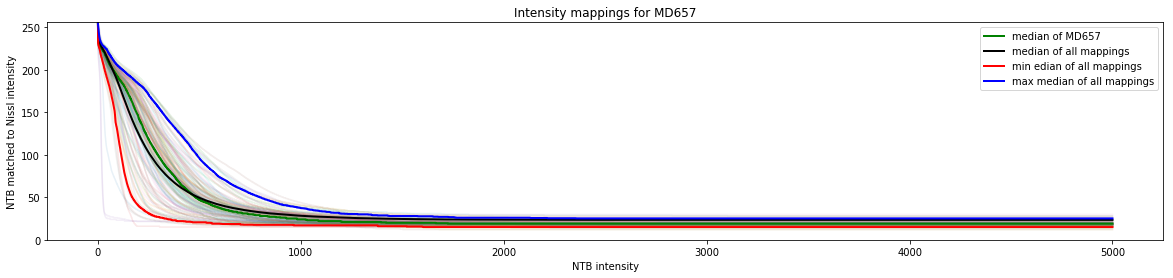

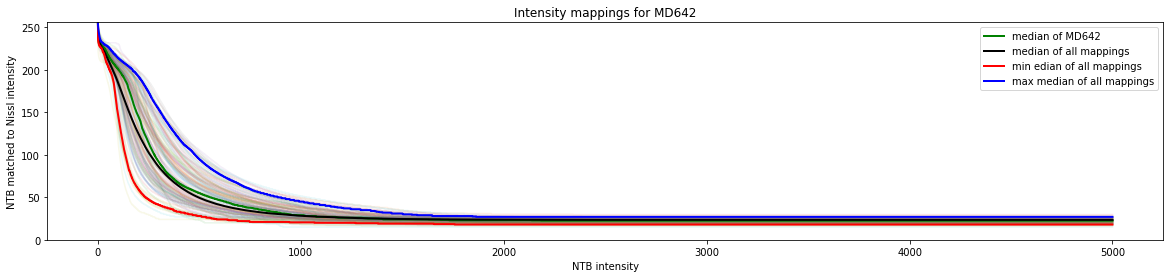

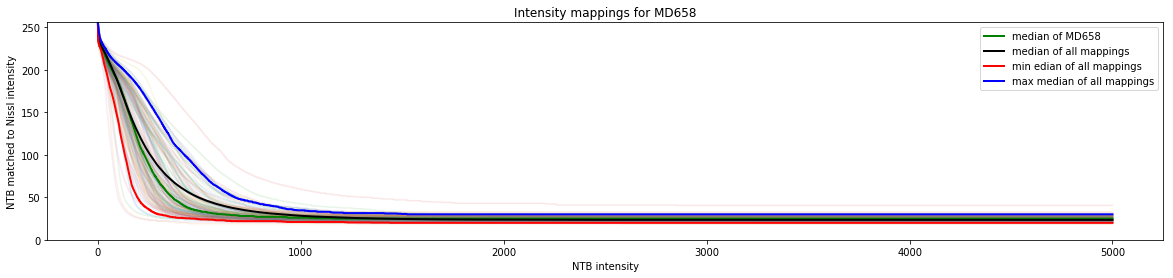

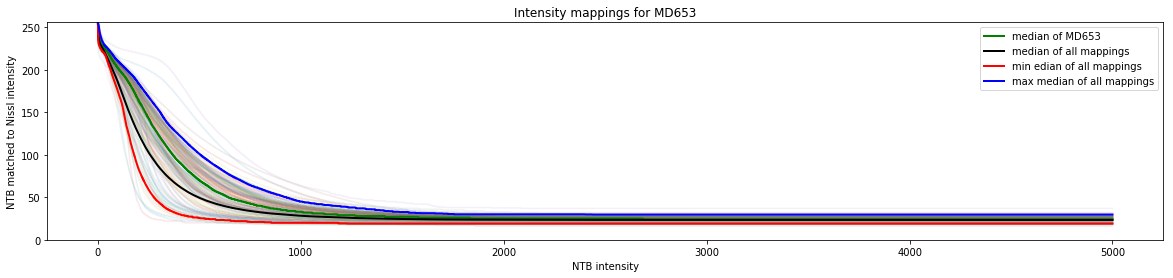

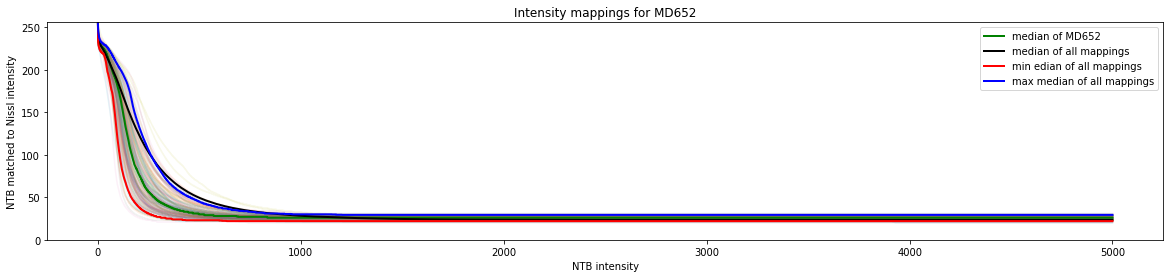

In [22]:
median_intensity_mappings_all_stacks = {}
intensity_mappings_all_stacks = {}

# for stack in ['MD657']:
for stack in all_alt_nissl_ntb_stacks + all_alt_nissl_tracing_stacks:

    filename_pairs = []
    l = metadata_cache['valid_filenames'][stack]
    for i, fn in enumerate(l):
        if l[i].split('-')[1][0] == 'F':
            for d in range(1, 99):
                if i+d < len(l) and l[i+d].split('-')[1][0] == 'N':
                    filename_pairs.append((l[i+d], l[i]))
                    break
                if i-d >= 0 and l[i-d].split('-')[1][0] == 'N':
                    filename_pairs.append((l[i-d], l[i]))
                    break
                    
    ntb_values = np.arange(0, 5001)

    intensity_mapping_all_pairs = {}

    for nissl_fn, ntb_fn in filename_pairs:
        
        try:
            fp = DataManager.get_ntb_to_nissl_intensity_profile_mapping_filepath(stack=stack, ntb_fn=ntb_fn)        
            download_from_s3(fp)
            ntb_intensity_mapping = np.load(fp)

            intensity_mapping_all_pairs[(nissl_fn, ntb_fn)] = ntb_intensity_mapping
        except:
            sys.stderr.write("Cannot load data for file pairs %s,%s.\n" % (nissl_fn, ntb_fn))

    #     plt.figure(figsize=(3,3));
    #     plt.plot(ntb_values, ntb_intensity_mapping)
    #     plt.xlim([0,5000]);
    #     plt.ylim([0,256]);
    #     plt.xlabel('NTB intensity');
    #     plt.ylabel('NTB matched to Nissl intensity');
    #     plt.title('nissl %s\n ntb %s' % (nissl_fn, ntb_fn));
    #     plt.show();
    
    if len(intensity_mapping_all_pairs) == 0:
        continue
        
    intensity_mappings_all_stacks[stack] = intensity_mapping_all_pairs.values()
    
    median_intensity_mapping = np.median(intensity_mapping_all_pairs.values(), axis=0)
    median_intensity_mappings_all_stacks[stack] = median_intensity_mapping
    
#     plt.figure(figsize=(20, 10));
#     for (nissl_fn, ntb_fn), m in intensity_mapping_all_pairs.iteritems():
#         plt.plot(ntb_values, m, alpha=.3);
#     plt.plot(ntb_values, median_intensity_mapping, linewidth=4, c='k');
#     plt.xlim([0,5000]);
#     plt.ylim([0,256]);
#     plt.xlabel('NTB intensity');
#     plt.ylabel('NTB matched to Nissl intensity');
#     plt.title('Intensity mappings for all image pairs, stack %s' % stack);
#     plt.show();
    
mean_intensity_mapping_all_stacks = np.mean(np.vstack(intensity_mappings_all_stacks.values()), axis=0)
mean_intensity_mapping_all_stacks2 = np.mean(median_intensity_mappings_all_stacks.values(), axis=0)
min_intensity_mapping_all_stacks = {stack: np.percentile(v, 5, axis=0) for stack, v in intensity_mappings_all_stacks.iteritems()}
max_intensity_mapping_all_stacks = {stack: np.percentile(v, 95, axis=0) for stack, v in intensity_mappings_all_stacks.iteritems()}

for stack, mim in intensity_mappings_all_stacks.iteritems():
    plt.figure(figsize=(20, 4));
    plt.plot(ntb_values, np.array(mim).T, alpha=.1);
    plt.plot(ntb_values, median_intensity_mappings_all_stacks[stack], linewidth=2, c='g', label='median of ' + stack);
    plt.plot(ntb_values, mean_intensity_mapping_all_stacks, linewidth=2, c='k', label='median of all mappings');
    plt.plot(ntb_values, min_intensity_mapping_all_stacks[stack], linewidth=2, c='r', label='min edian of all mappings');
    plt.plot(ntb_values, max_intensity_mapping_all_stacks[stack], linewidth=2, c='b', label='max median of all mappings');
#     plt.plot(ntb_values, mean_intensity_mapping_all_stacks2, linewidth=2, c='r', label='median of all stack medians');
    plt.ylim([0,256]);
    plt.xlabel('NTB intensity');
    plt.ylabel('NTB matched to Nissl intensity');
    plt.title('Intensity mappings for %s' % stack);
    plt.legend();
    plt.show();

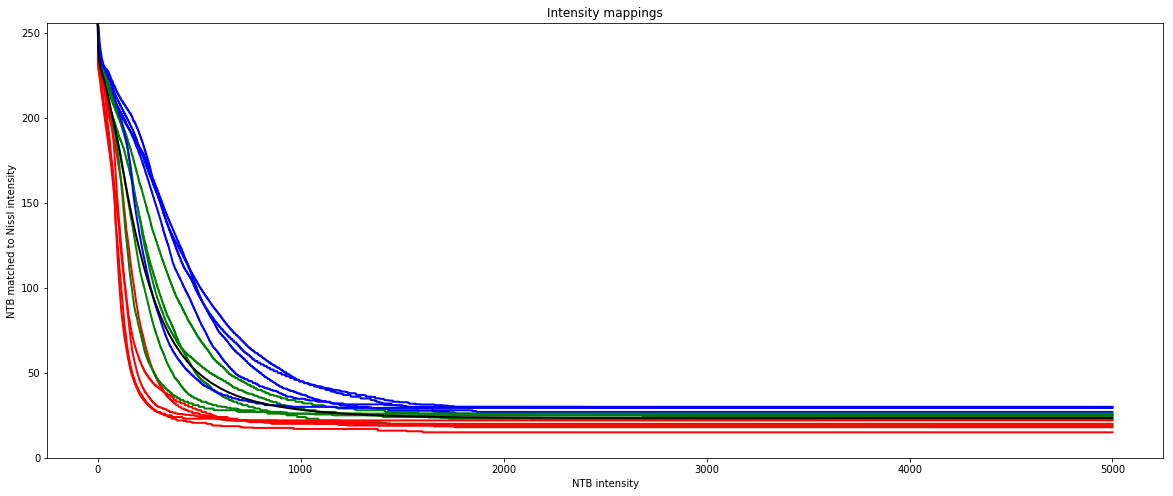

In [30]:
plt.figure(figsize=(20, 8));
for stack, mim in intensity_mappings_all_stacks.iteritems():
#     plt.plot(ntb_values, np.array(mim).T, alpha=.1);
    plt.plot(ntb_values, median_intensity_mappings_all_stacks[stack], linewidth=2, c='g', label='median of ' + stack);
    plt.plot(ntb_values, min_intensity_mapping_all_stacks[stack], linewidth=2, c='r', label='min');
    plt.plot(ntb_values, max_intensity_mapping_all_stacks[stack], linewidth=2, c='b', label='max');
plt.plot(ntb_values, mean_intensity_mapping_all_stacks, linewidth=2, c='k', label='median of all');
plt.ylim([0,256]);
plt.xlabel('NTB intensity');
plt.ylabel('NTB matched to Nissl intensity');
plt.title('Intensity mappings');
# plt.legend();
plt.show();

In [35]:
vs = np.concatenate(intensity_mappings_all_stacks.values())
min_mapping = np.percentile(vs, 5, axis=0)
max_mapping = np.percentile(vs, 95, axis=0)
median_mapping = np.percentile(vs, 50, axis=0)

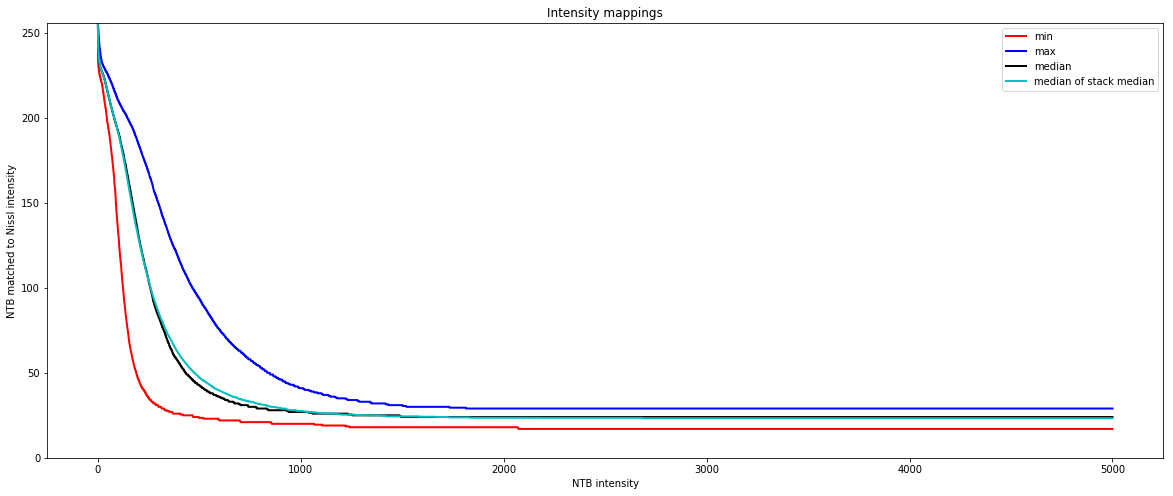

In [42]:
plt.figure(figsize=(20, 8));
plt.plot(ntb_values, min_mapping, linewidth=2, c='r', label='min');
plt.plot(ntb_values, max_mapping, linewidth=2, c='b', label='max');
plt.plot(ntb_values, median_mapping, linewidth=2, c='k', label='median');
plt.plot(ntb_values, mean_intensity_mapping_all_stacks2, linewidth=2, c='c', label='median of stack median');
plt.ylim([0,256]);
plt.xlabel('NTB intensity');
plt.ylabel('NTB matched to Nissl intensity');
plt.title('Intensity mappings');
plt.legend();
plt.show();

In [38]:
fp = os.path.join(DATA_DIR, 'median_nissl_intensity_mapping.npy')
np.save(fp, median_mapping)
upload_to_s3(fp)

fp = os.path.join(DATA_DIR, 'min_nissl_intensity_mapping.npy')
np.save(fp, min_mapping)
upload_to_s3(fp)

fp = os.path.join(DATA_DIR, 'max_nissl_intensity_mapping.npy')
np.save(fp, max_mapping)
upload_to_s3(fp)

aws s3 cp "/shared/CSHL_data_processed/median_nissl_intensity_mapping.npy" "s3://mousebrainatlas-data/CSHL_data_processed/median_nissl_intensity_mapping.npy"
aws s3 cp "/shared/CSHL_data_processed/min_nissl_intensity_mapping.npy" "s3://mousebrainatlas-data/CSHL_data_processed/min_nissl_intensity_mapping.npy"
aws s3 cp "/shared/CSHL_data_processed/max_nissl_intensity_mapping.npy" "s3://mousebrainatlas-data/CSHL_data_processed/max_nissl_intensity_mapping.npy"


In [4]:
fp = os.path.join(DATA_DIR, 'average_nissl_intensity_mapping.npy')
np.save(fp, mean_intensity_mapping_all_stacks)
upload_to_s3(fp)

aws s3 cp /shared/CSHL_data_processed/average_nissl_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/average_nissl_intensity_mapping.npy


Child returned 0
0.36 seconds.


# Fit exponential to median intensity mapping

In [3]:
fp = os.path.join(DATA_DIR, 'average_nissl_intensity_mapping.npy')
download_from_s3(fp)
mean_intensity_mapping = np.load(fp)

rm -rf /shared/CSHL_data_processed/average_nissl_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/average_nissl_intensity_mapping.npy /shared/CSHL_data_processed/average_nissl_intensity_mapping.npy


Child returned 0
Child returned 0
0.46 seconds.


In [6]:
len(mean_intensity_mapping)

5000

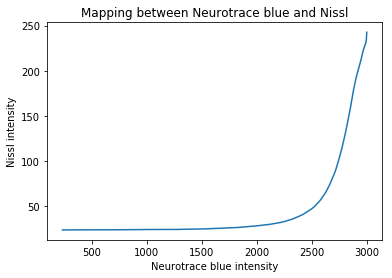

In [4]:
plt.figure();
valid_range = np.where(np.diff(mean_intensity_mapping) != 0)[0]
plt.plot(valid_range, mean_intensity_mapping[valid_range]);
plt.xlabel('Neurotrace blue intensity');
plt.ylabel('Nissl intensity');
plt.title('Mapping between Neurotrace blue and Nissl');

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


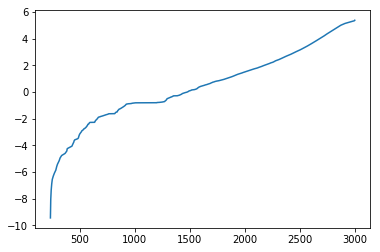

In [25]:
c = mean_intensity_mapping[valid_range].min()
log_f = np.log(mean_intensity_mapping[valid_range] - c)
plt.plot(valid_range, log_f);

- We expect the exponent plot to be linear, but it is NOT fully linear.